## Le système de Ptolémée

Au II$^{me}$ siècle, l'astronome grec Ptolémée proposa un model géocentrique qui survivra jusqu'au XVII$^{me}$ siècle.

Dans le système de Ptolémée, la Terre se trouve au centre de l'univers et les autres corps célestes se déplacent le long d'une orbite circulaire de rayon $r$ (épicycle), dont le centre tourne autour de la Terre le long d'une orbite circulaire de rayon $R$ (déférent). 

On décrit le mouvement le long de l'épicycle et du déférent à l'aide des angles $\theta$ et $\phi$ tels que $\dot{\theta}=\omega$ et $\dot{\phi}=\Omega$, avec $\omega$ et $\Omega$, vitesses angulaires constantes et positives.

Quelle est l'allure de la trajectoire en fonction des paramètre $r$, $R$, $\omega$ et $\Omega$?

## Un petit dessin permet de visualiser la situation et les paramètres

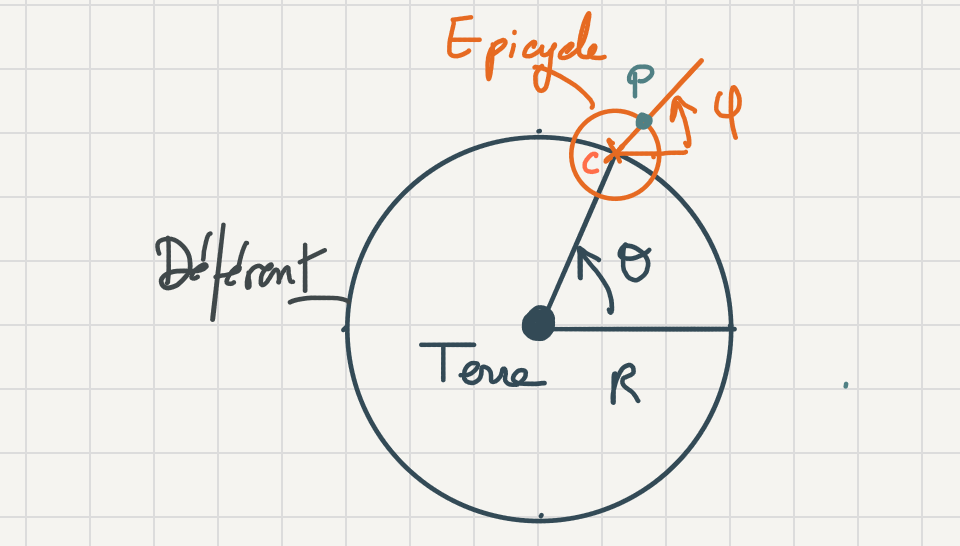

In [1]:
from IPython.display import Image
Image("Ptolemee.png")

## On trace la trajectoire de manière dynamique

In [1]:
import numpy as np

from bokeh.io import output_notebook, push_notebook
from bokeh.models import ColumnDataSource
from bokeh.models.callbacks import CustomJS
from bokeh.models.markers import Cross
from bokeh.models.widgets import Slider,Button, Toggle
from bokeh.plotting import figure, show
from bokeh.layouts import row, column
from bokeh.events import ButtonClick
import time
from bokeh.application.handlers.function import FunctionHandler
# from bokeh.events import ButtonClick
# from bokeh.models import 

output_notebook()

Loading BokehJS ...

In [2]:
def orbit(c, r=1):
    theta = np.arange(0,2*np.pi+0.05,0.05)
    x,y = r*R*np.cos(theta), r*R*np.sin(theta)
    return x+c[0], y+c[1]

def trajectory(t, r, w):
    X,Y = R*np.cos(W*t), R*np.sin(W*t)
    x,y = r*R*np.cos(W*w*t), r*R*np.sin(W*w*t)
    
    return (X,Y),(x+X,Y+y)

In [3]:
R=1
W=1
r=.37
w=-1*np.pi

In [7]:
dt=0.01
T=100

######################
# set up
X = np.empty(1)
Y = X.copy()
x = X.copy()
y = X.copy()

t = 0
(X[0],Y[0]),(x[0],y[0]) = trajectory(t, r, w)

orbit1_x, orbit1_y = orbit([0,0])
orbit2_x, orbit2_y = orbit([X[0],Y[0]], r=r)

point_src = ColumnDataSource(data={'X':[X[0]], 'Y':[Y[0]], 'x':[x[0]], 'y':[y[0]]})
traj_src = ColumnDataSource(data={'X':[X[0]], 'Y':[Y[0]], 'x':[x[0]], 'y':[y[0]]})
orbit_src = ColumnDataSource(data={'orbit1_x':orbit1_x, 'orbit1_y':orbit1_y,\
                                   'orbit2_x':orbit2_x, 'orbit2_y':orbit2_y})

######################
# plot setup
plot = figure(title ='Time: '+str(t),\
              x_range=(-1.2*(1+r*R),1.2*(1+r*R)), y_range=(-1.2*(1+r*R),1.2*(1+r*R)))

o1 = plot.line('orbit1_x', 'orbit1_y', line_width=2, line_alpha=0.1,color='blue',source=orbit_src )
o2 = plot.line('orbit2_x', 'orbit2_y', line_width=2, line_alpha=0.1,color='red',source=orbit_src)

traj1 = plot.line('X','Y',line_width=2, color='blue', source=traj_src)
traj2 = plot.line('x','y',line_width=2, color='red', source=traj_src)

point1 = plot.circle('X','Y',color='blue',source=point_src)
point2 = plot.circle('x','y',color='red',source=point_src)


# button = Button(label="► Play", button_type="success")
slider_w = Slider(start=-10, end=10, value=1, step=.5, title="Relative angular speed")
slider_r = Slider(start=0, end=1, value=.1, step=.05, title="Relative radius")


# def print_hey():
#     """
#     prints sth"""
#     print('hellow there!')

# h = FunctionHandler(print_hey)

# def callback():
    
#     if button.label == "► Play":
#         button.label = "❚❚ Pause"
# #         curdoc().add_periodic_callback(animate_update, 200)
#     else:
#         button.label = "► Play"
# #         curdoc().remove_periodic_callback(animate_update)
#     push_notebook(handle=handle)

    
callback = CustomJS(code="""
// the model that triggered the callback is cb_obj:
var active = cb_obj;
var label = cb_obj.label;
if (status){
    label = "asds";
}
""")    
    

button = Toggle(label="► Play")
button.js_on_click(callback)
# button.js_on_event(ButtonClick, CustomJS(code='console.log("JS:Click")'))

    
# button.on_click(callback)
layout = row(plot,column(button,slider_r, slider_w))
handle=show(layout, notebook_handle=True);
    
while ((t<T)) :
    t+=dt

    (X_new, Y_new), (x_new, y_new) = trajectory(t, r, w)
    new_data = {'X': [X_new], 'Y': [Y_new], 'x': [x_new], 'y':[y_new]}
    traj_src.stream(new_data, 2000)
    
    orbit1_x, orbit1_y = orbit([0,0])
    orbit2_x, orbit2_y = orbit([X_new,Y_new], r=r)
    
    o1.data_source.data['orbit1_x'] = orbit1_x
    o1.data_source.data['orbit1_y'] = orbit1_y
    o2.data_source.data['orbit2_x'] = orbit2_x
    o2.data_source.data['orbit2_y'] = orbit2_y
    
    point1.data_source.data['X']= [X_new]
    point1.data_source.data['Y']= [Y_new]
    point2.data_source.data['x']= [x_new]
    point2.data_source.data['y']= [y_new]
    
#     plot.circle(X[idx],Y[idx],color='blue')
#     plot.circle(x[idx],y[idx],color='red')
    
    plot.title.text = 'Time: {0:.2f}'.format(t)
    push_notebook(handle=handle)
    time.sleep(0.01)

KeyboardInterrupt: 

In [33]:
button.active

False